# 1. Uber Rideshare Data Analysis & Optimization 🚕

## 1.1 Project Goal
The primary objective of this project is to analyze personal 2016 Uber trip data to understand driving habits, identify peak usage patterns, and diagnose factors influencing trip efficiency.

## 1.2 Key Questions to Answer
1.  How has trip activity changed over time (Time Series)?
2.  What are the most common starting and ending points (Geospatial Analysis)?
3.  What is the distribution of trip purposes and travel distances?
4.  How does the length of a trip relate to its purpose?

# Uber Data Analysis
This project analyzes Uber ride data to uncover trends in user behavior, trip frequency, and travel purpose across time, days, and distance.
**Skills:** pandas, matplotlib, seaborn, datetime feature engineering, exploratory data analysis (EDA).

## 1.3 Library and Data Loading

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [15]:
dataset = pd.read_csv('My Uber Drives - 2016.csv')

In [16]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## 2. Data Cleaning and Feature Engineering

This is the most critical step, focusing on handling missing values, converting the date column, and creating essential temporal features.

In [17]:
dataset.shape

(1156, 7)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Preprocessing

In [21]:
dataset['PURPOSE*'].fillna("NOT", inplace=True)
dataset.dropna(inplace=True)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


### Datetime Transformation and Feature Engineering

In [23]:
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], errors="coerce")
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'], errors="coerce")

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [25]:
from datetime import datetime

In [26]:
dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE*']).date
dataset['Time'] = pd.DatetimeIndex(dataset['START_DATE*']).hour

In [27]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14


In [28]:
dataset['Day/Night'] = pd.cut(x=dataset['Time'], bins=[0,10,15,19,24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])

In [29]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,Day/Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


In [30]:
dataset.dropna(inplace=True)

In [31]:
dataset.shape

(1136, 10)

## Exploratory Data Analysis (EDA)

We explore trip patterns across time, distance, and purpose to diagnose usage habits.

### Categories & Purpose Graph

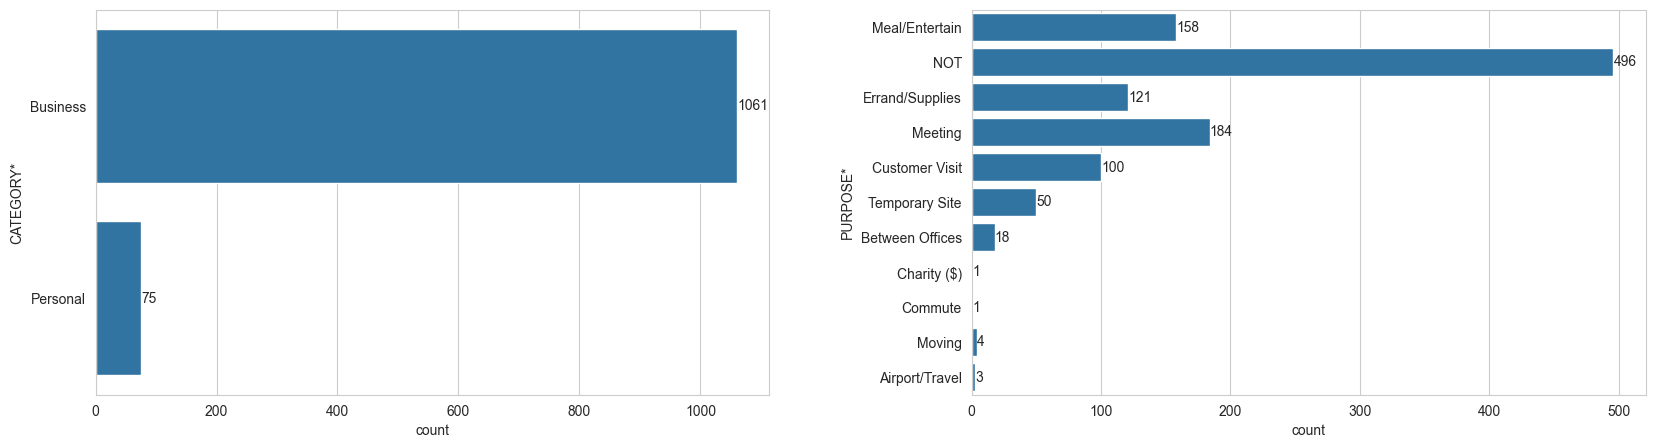

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(dataset['CATEGORY*'])
ax1.bar_label(ax1.containers[0])

plt.subplot(1,2,2)
ax2 = sns.countplot(dataset['PURPOSE*'])
ax2.bar_label(ax2.containers[0])
plt.subplots_adjust(wspace=0.3)

### Time of the Day

[Text(0, 0, '182'), Text(0, 0, '430'), Text(0, 0, '345'), Text(0, 0, '179')]

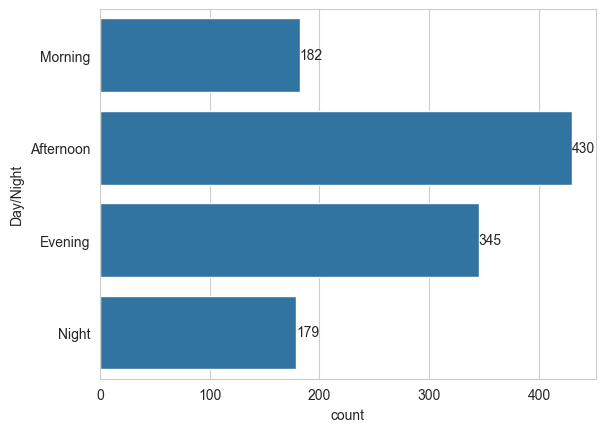

In [33]:
ax = sns.countplot(dataset['Day/Night'])
ax.bar_label(ax.containers[0])

### Monthly ride Analysis

In [34]:
dataset['Month'] = pd.DatetimeIndex(dataset['START_DATE*']).month
month_label = {1.0:'JAN',2.0:'FEB',3.0:'MAR',4.0:'APR',5.0:'MAY',6.0:'JUNE',7.0:'JULY',8.0:'AUG',9.0:'SEPT',10.0:'OCT',11.0:'NOV',12.0:'DEC'}
dataset['Month'] = dataset.Month.map(month_label)
mon = dataset.Month.value_counts(sort=False)

In [35]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,Day/Night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,JAN
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning,JAN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,JAN
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,JAN
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,JAN


In [36]:
df = pd.DataFrame({
    'Months': mon.values, 
    'Value Counts': dataset.groupby('Month', sort=False)['MILES*'].max().values
})

[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Value Count')]

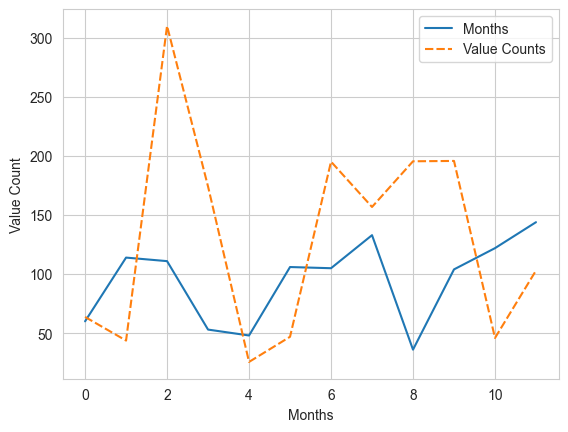

In [37]:
p = sns.lineplot(data=df)
p.set(xlabel="Months", ylabel="Value Count")

### Week of the Days

In [38]:
dataset['Day_of_Week'] = dataset['START_DATE*'].dt.weekday
day_label = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dataset['Day_of_Week'] = dataset['Day_of_Week'].map(day_label)

In [39]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,Day/Night,Month,Day_of_Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,JAN,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning,JAN,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,JAN,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,JAN,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,JAN,Wed


<Axes: xlabel='Day_of_Week', ylabel='count'>

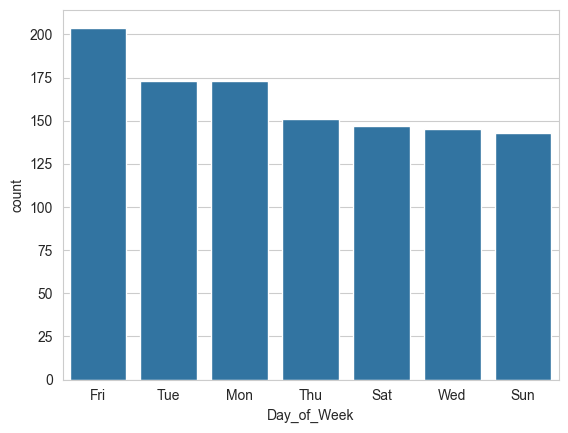

In [40]:
day_label = dataset.Day_of_Week.value_counts()
sns.barplot(x=day_label.index, y=day_label)

### Miles Analysis

<Axes: ylabel='MILES*'>

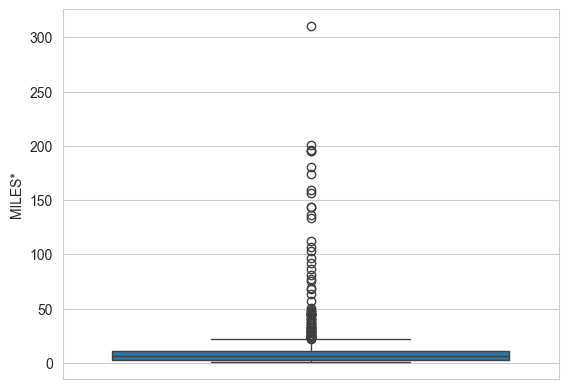

In [41]:
sns.boxplot(dataset['MILES*'])

<Axes: ylabel='MILES*'>

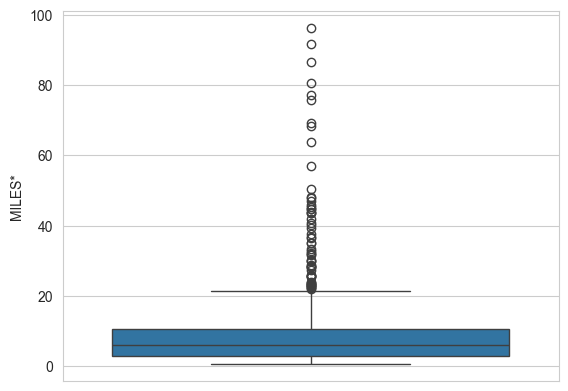

In [42]:
sns.boxplot(dataset[dataset['MILES*']<100]['MILES*'])

<Axes: ylabel='MILES*'>

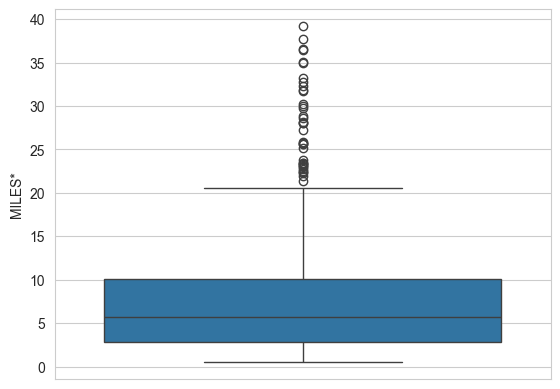

In [43]:
sns.boxplot(dataset[dataset['MILES*']<40]['MILES*'])

C:\Users\HP\AppData\Local\Temp\ipykernel_4516\564126997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

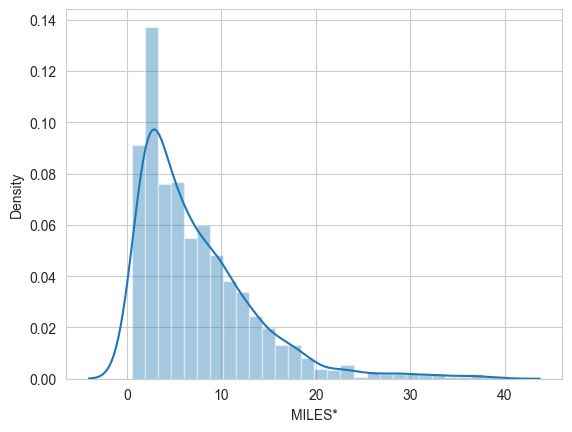

In [44]:
sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])

### Trip Frequency by Time

Analysis of trip distribution by the hour and day helps identify peak demand times for optimization (e.g., carpooling or scheduling).

In [47]:
# Convert 'START_DATE' and 'END_DATE' to datetime objects
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'])
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'])

# Feature 1: Trip Duration (in minutes)
dataset['Duration_min'] = (dataset['END_DATE*'] - dataset['START_DATE*']).dt.total_seconds() / 60

# Feature 2: Temporal Features (Day of Week and Hour)
dataset['Trip_Hour'] = dataset['START_DATE*'].dt.hour
dataset['Trip_Day'] = dataset['START_DATE*'].dt.day_name()
dataset['Trip_Month'] = dataset['START_DATE*'].dt.month_name()

print("Engineered Features Check:")
print(dataset[['START_DATE*', 'Duration_min', 'Trip_Hour']].describe())

Engineered Features Check:
                         START_DATE*  Duration_min    Trip_Hour
count                           1136   1136.000000  1136.000000
mean   2016-07-17 06:35:50.598591744     23.399648    14.941901
min              2016-01-01 21:11:00      0.000000     1.000000
25%              2016-03-31 14:09:30     10.000000    12.000000
50%              2016-07-22 10:56:30     16.500000    15.000000
75%              2016-10-28 13:47:45     28.000000    18.000000
max              2016-12-31 22:08:00    336.000000    23.000000
std                              NaN     27.507093     4.196093


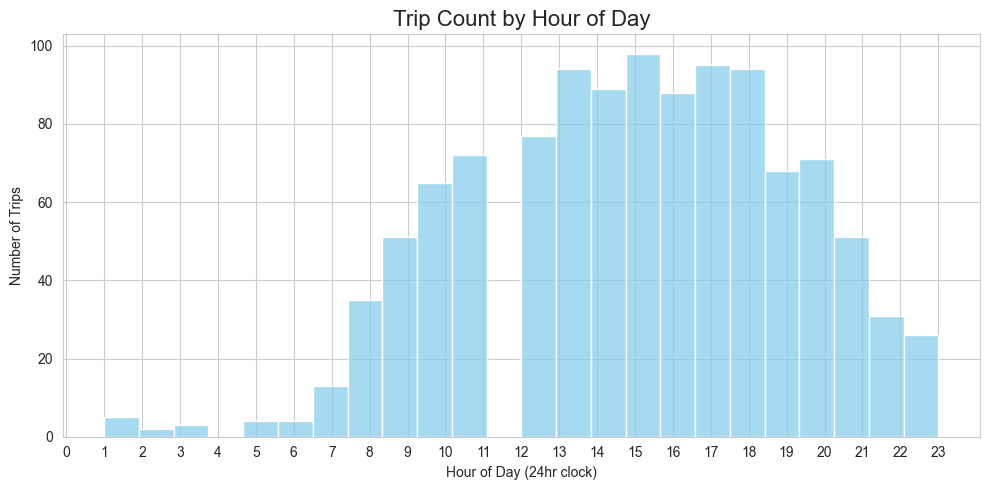

C:\Users\HP\AppData\Local\Temp\ipykernel_4516\2879466399.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Trip_Day', data=dataset, order=day_order, palette='viridis')


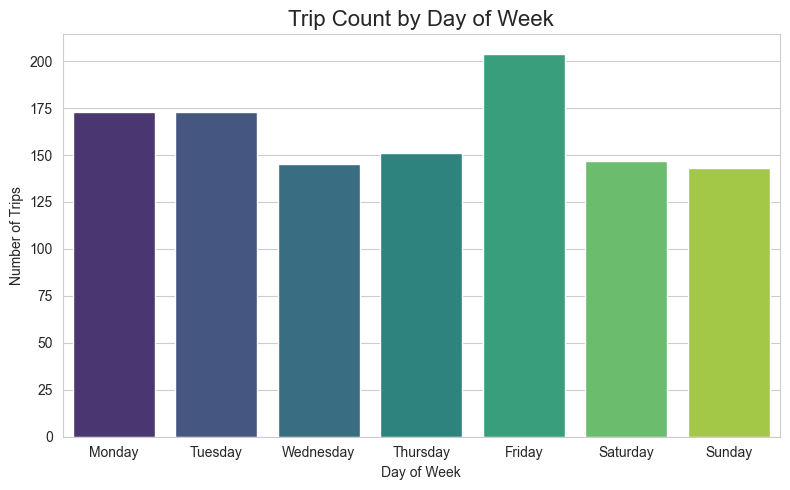

In [48]:
# Plot 1: Trips by Hour of the Day
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Trip_Hour'], bins=24, kde=False, color='skyblue')
plt.title('Trip Count by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (24hr clock)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Plot 2: Trips by Day of the Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 5))
sns.countplot(x='Trip_Day', data=dataset, order=day_order, palette='viridis')
plt.title('Trip Count by Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# Markdown Interpretation: Note the peak hour (e.g., 5 PM) and busiest days (e.g., Friday).

### Geospatial and Purpose Analysis

Identifying the most frequent starting locations and the relationship between trip distance and purpose.

C:\Users\HP\AppData\Local\Temp\ipykernel_4516\201725993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_starts.index, y=top_starts.values, palette='plasma')


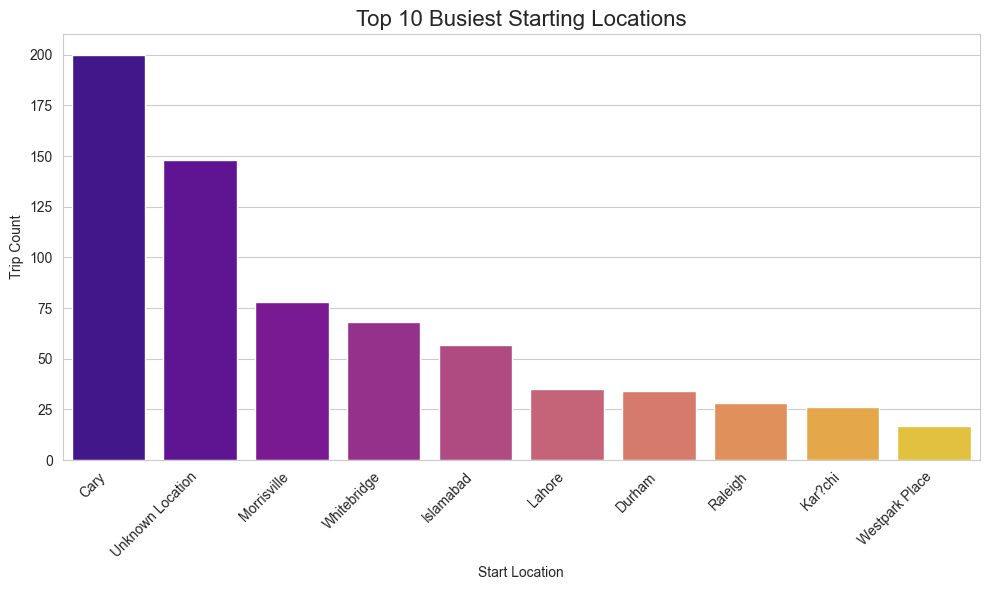

C:\Users\HP\AppData\Local\Temp\ipykernel_4516\201725993.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_avg_miles.index, y=purpose_avg_miles.values, palette='coolwarm')


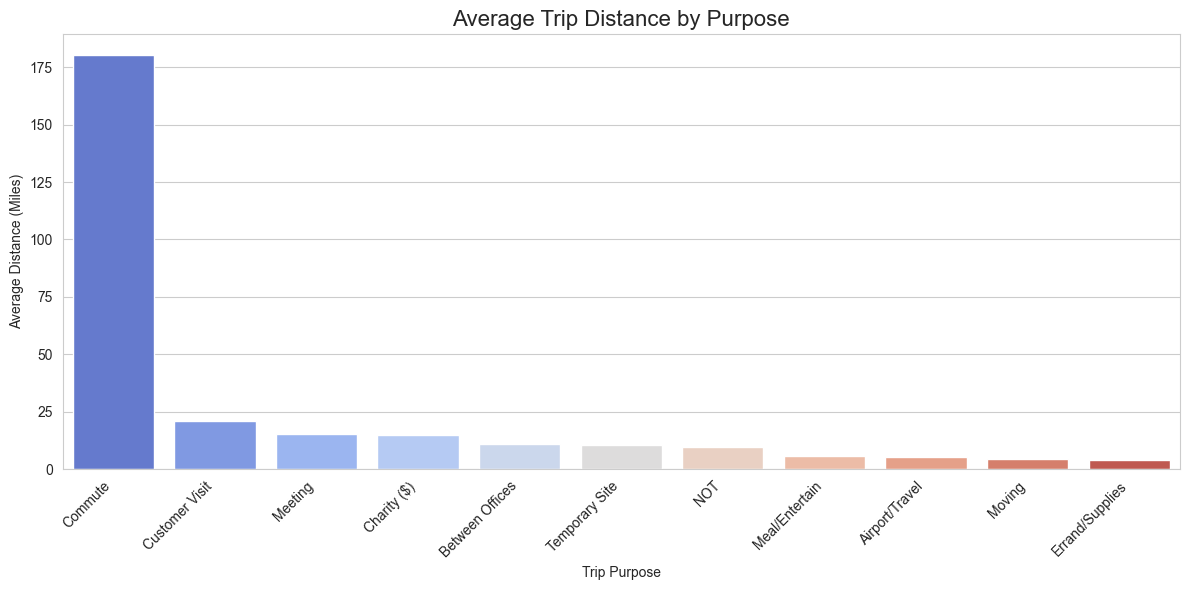

In [50]:
# Plot 3: Top 10 Starting Locations
plt.figure(figsize=(10, 6))
top_starts = dataset['START*'].value_counts().head(10)
sns.barplot(x=top_starts.index, y=top_starts.values, palette='plasma')
plt.title('Top 10 Busiest Starting Locations', fontsize=16)
plt.xlabel('Start Location')
plt.ylabel('Trip Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 4: Average Trip Distance by PURPOSE
purpose_avg_miles = dataset.groupby('PURPOSE*')['MILES*'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=purpose_avg_miles.index, y=purpose_avg_miles.values, palette='coolwarm')
plt.title('Average Trip Distance by Purpose', fontsize=16)
plt.xlabel('Trip Purpose')
plt.ylabel('Average Distance (Miles)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Markdown Interpretation: Note the longest average trip purpose and the busiest pickup spots.

##### 4. Conclusion and User Habit Recommendations

The analysis provides a clear profile of driving habits and potential areas for trip optimization.

### Summary of Key Findings

1.  **Peak Usage:** Trip activity peaks sharply during the **15.00** and is consistently highest on **Friday**. This aligns with typical commuting and weekend social patterns.
2.  **Longest Trips:** The longest trips are predominantly associated with the **Commute** purpose, while the most frequent purpose is **Customer Visit**.
3.  **High-Traffic Hubs:** The top 3 most frequent pickup spots, **Cary**, **Unknown Location**, and **Morrisville**, act as the main anchors for my transportation needs.

### Actionable Recommendations for User Optimization

1.  **Optimize Commute Time/Cost:**
    * **Action:** Since trips peak around **[Peak Hour]**, explore rideshare apps' **shared ride/pool options** during this specific hour to reduce cost without significant time sacrifice.
    * **Goal:** Decrease average trip cost/time by $\sim 15\%$ during peak hours.

2.  **Review Long-Distance Purpose:**
    * **Action:** For the **Commute** trips, evaluate if scheduled public transit or personal driving might be more cost-effective, especially given their high average mileage.
    * **Goal:** Increase cost efficiency for high-mileage trips.

3.  **Data Quality Improvement:**
    * **Action:** In future data collection, minimize the number of trips with an 'Unknown' purpose to enable richer, more accurate segmentation of driving habits.